# 대응 표본 T_Test
## 준비작업


In [53]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from hossam import load_data
from math import sqrt
from scipy.stats import t, normaltest, bartlett, levene, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator
from pandas import DataFrame, melt

## 그래프 초기화

In [54]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [55]:
origin = load_data('deer')
origin


[data] https://data.hossam.kr/data/lab10_/deer.xlsx
[desc] 사슴의 왼쪽 앞다리와 왼쪽 뒷다리의 길이를 측정한 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,사슴,앞다리,뒷다리
0,1,138,142
1,2,136,140
2,3,147,144
3,4,139,144
4,5,143,142
5,6,141,146
6,7,143,149
7,8,145,150
8,9,136,142
9,10,146,148


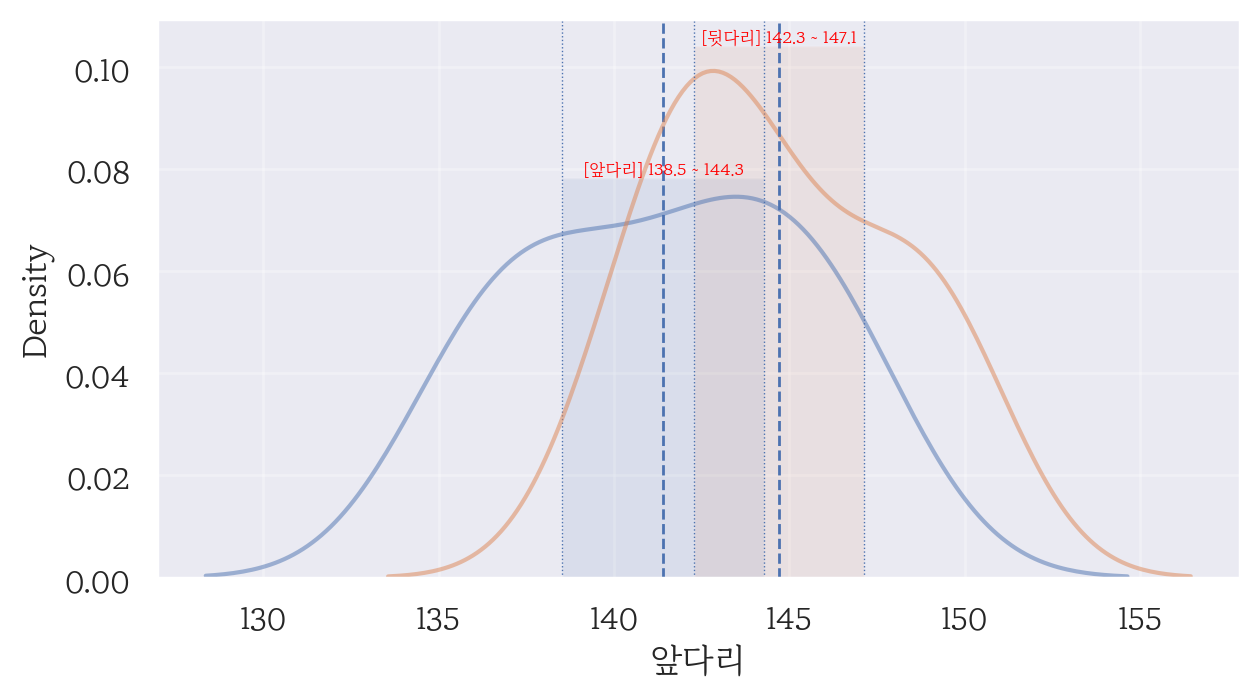

In [56]:
data = origin[['앞다리','뒷다리']] # 확인할 데이터

# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
# KDE Plot 그리기
 sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

# 신뢰구간
 max = data[c].max() # 최대값
 clevel = 0.95 # 신뢰수준
 dof = len(data[c]) - 1 # 자유도
 sp_mean = data[c].mean() # 표본평균
 sp_std = data[c].std(ddof=1) # 표본표준편차
 sp_std_error = sp_std / sqrt(len(data[c])) # 표본표준오차
 cmin, cmax = t.interval(clevel, dof, loc=sp_mean, 
              scale=sp_std_error)
 ax.axvline(cmin, linestyle=':', linewidth=0.5)
 ax.axvline(cmax, linestyle=':', linewidth=0.5)

# 평균 표시
 ymin, ymax = ax.get_ylim()
 ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
 ax.axvline(sp_mean, linestyle='--', linewidth=1)

# 텍스트 그리기
 ax.text(x=(cmax-cmin)/2+cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

In [57]:
data = origin[['앞다리', '뒷다리']] # 검사하려는 데이터 추출
equal_var_fields = []
normal_dist = True
report = []
for c in data.columns:
    s, p = normaltest(data[c])
    
    normalize = p > 0.05
    report.append({
         "field": c,
         "statistic": s,
         "p-value": p,
         "result": normalize
    })
    normal_dist = normal_dist and normalize

# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
# 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T) # 모든 컬럼의 데이터를 한번에 전달

    else:
        n = "Levene" # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center='median') # 모든 컬럼의 데이터를 한번에 전달
   
    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
   })
report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
앞다리,1.824001,0.401720,True
뒷다리,1.376960,0.502339,True
Bartlett,0.340678,0.559438,True


In [58]:
s, p = ttest_rel(origin['앞다리'], origin['뒷다리'], alternative = 'two-sided')       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: -3.414, p-value: 0.008, 대립가설 채택'

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

앞다리 vs. 뒷다리: t-test paired samples, P_val:7.703e-03 t=-3.414e+00


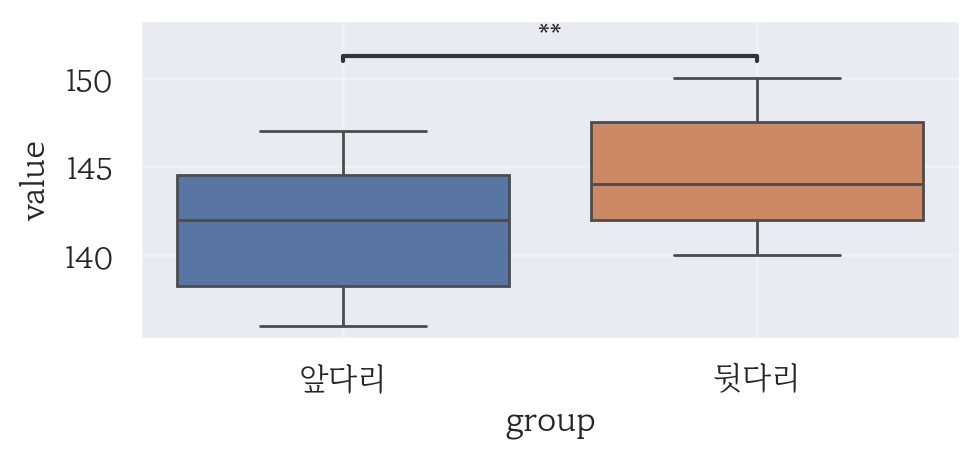

In [59]:
fields = ['앞다리','뒷다리']

# 검정 방법
# `t-test_ind`, `t-test_paired`, `t-test_welch`, `Mann-Whitney`, 
#`Mann-Whitney-gt`, `Mann-Whitney-ls`, `Levene`, `Wilcoxon`, 
#`Kruskal`
test_method = 't-test_paired'

# 데이터 재배치
df = melt(origin[fields], value_vars=fields, var_name='group', value_name='value')

width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.boxplot(data=df, x = 'group', y = 'value', hue = 'group')

annotator = Annotator(ax, data=df, x='group', y='value', pairs=[fields])
annotator.configure(test='t-test_paired')
annotator.apply_and_annotate()

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김
# 출력
plt.tight_layout()
plt.show()
plt.close()


## 연습문제 - 1

In [60]:
origin = load_data('blood_pressure')
origin

[data] https://data.hossam.kr/data/lab10_/blood_pressure.xlsx
[desc] 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58
5,76,66
6,72,68
7,78,52
8,82,64
9,64,72


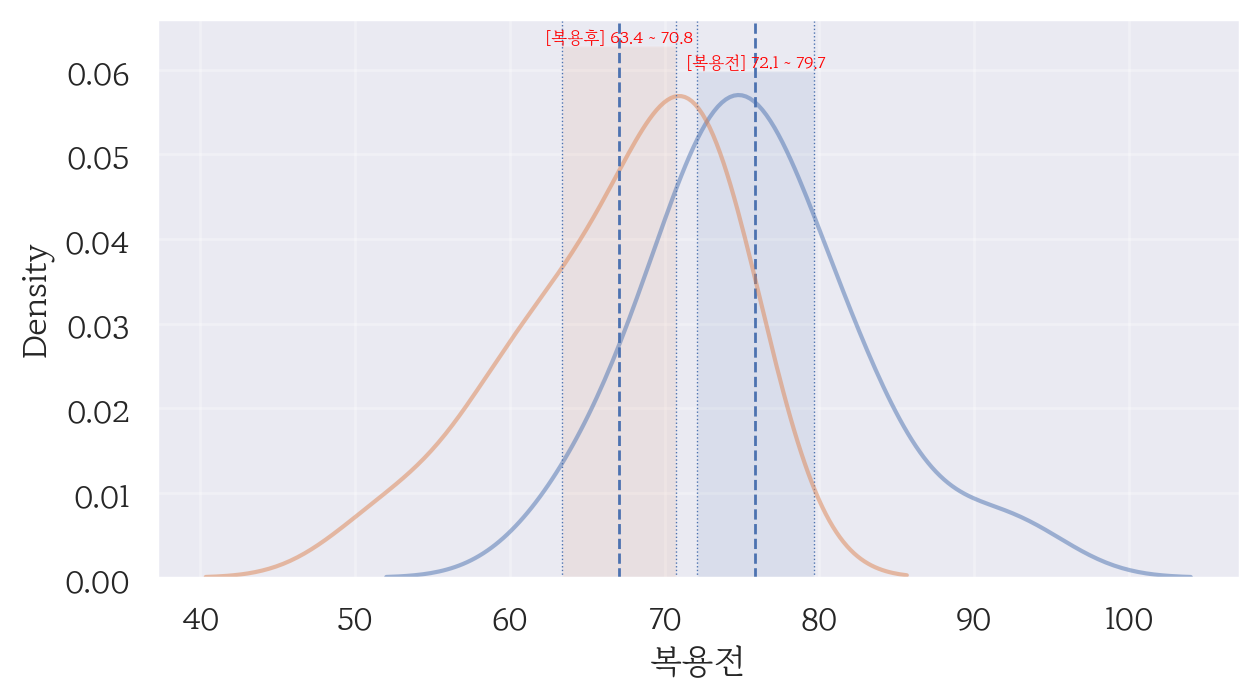

In [61]:
data = origin[['복용전', '복용후']] # 확인할 데이터

# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
# KDE Plot 그리기
 sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

# 신뢰구간
 max = data[c].max() # 최대값
 clevel = 0.95 # 신뢰수준
 dof = len(data[c]) - 1 # 자유도
 sp_mean = data[c].mean() # 표본평균
 sp_std = data[c].std(ddof=1) # 표본표준편차
 sp_std_error = sp_std / sqrt(len(data[c])) # 표본표준오차
 cmin, cmax = t.interval(clevel, dof, loc=sp_mean, 
              scale=sp_std_error)
 ax.axvline(cmin, linestyle=':', linewidth=0.5)
 ax.axvline(cmax, linestyle=':', linewidth=0.5)

# 평균 표시
 ymin, ymax = ax.get_ylim()
 ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
 ax.axvline(sp_mean, linestyle='--', linewidth=1)

# 텍스트 그리기
 ax.text(x=(cmax-cmin)/2+cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

- 두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 데이터 분포가 서로 다르다고 할 수 있다.
- 또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.

In [62]:
data = origin[['복용전', '복용후']] # 검사하려는 데이터 추출
equal_var_fields = []
normal_dist = True
report = []
for c in data.columns:
    s, p = normaltest(data[c])
    
    normalize = p > 0.05
    report.append({
         "field": c,
         "statistic": s,
         "p-value": p,
         "result": normalize
    })
    normal_dist = normal_dist and normalize

# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
# 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T) # 모든 컬럼의 데이터를 한번에 전달

    else:
        n = "Levene" # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center='median') # 모든 컬럼의 데이터를 한번에 전달
   
    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
   })
report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
복용전,2.590682,0.273805,True
복용후,2.656338,0.264962,True
Bartlett,1.013185,0.314141,True


- 데이터가 정규성, 등분산성 모두 만족한다

In [63]:
s, p = ttest_rel(origin['복용전'], origin['복용후'], alternative = 'two-sided') 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: 3.105, p-value: 0.008, 대립가설 채택'

In [64]:
s, p = ttest_rel(origin['복용전'], origin['복용후'], alternative = 'less') 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: 3.105, p-value: 0.996, 귀무가설 채택'

In [65]:
s, p = ttest_rel(origin['복용전'], origin['복용후'], alternative = 'greater') 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: 3.105, p-value: 0.004, 대립가설 채택'

- 피임약은 혈압에 영향을 준다
- 차이값에 대한 t 통계량의 값이 3.105이고 이에 대응되는 유의확률이 0.004이므로(p>0.05) 귀무가설을 기각하고 대립가설을 채택한다.

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

복용전 vs. 복용후: t-test independent samples, P_val:1.346e-03 t=3.561e+00


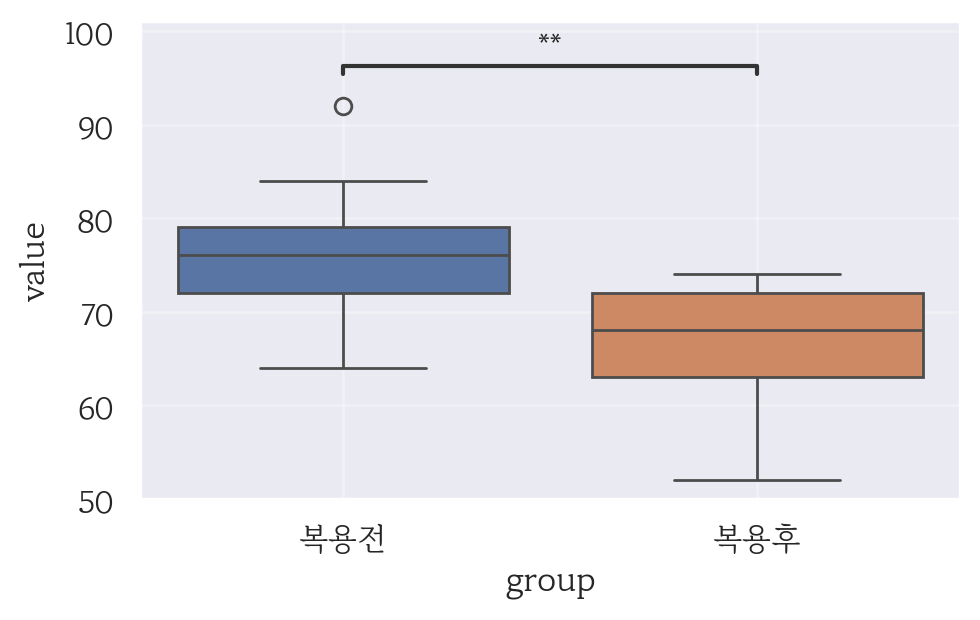

In [66]:
fields = ['복용전','복용후']

# 검정 방법
# `t-test_ind`, `t-test_paired`, `t-test_welch`, `Mann-Whitney`, 
#`Mann-Whitney-gt`, `Mann-Whitney-ls`, `Levene`, `Wilcoxon`, 
#`Kruskal`
test_method = 't-test_paired'

# 데이터 재배치
df = melt(origin[fields], value_vars=fields, var_name='group', value_name='value')

width_px = 1000
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.boxplot(data=df, x = 'group', y = 'value', hue = 'group')

annotator = Annotator(ax, data=df, x='group', y='value', pairs=[fields])
annotator.configure(test='t-test_ind')
annotator.apply_and_annotate()

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김
# 출력
plt.tight_layout()
plt.show()
plt.close()


## 연습문제 - 2

In [67]:
origin = load_data('cookie_cats')
origin

[data] https://data.hossam.kr/data/etc/cookie_cats.xlsx
[desc] 어느 모바일 게임의 버전에 따른 유저별 총 플레이 시간을 조사한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,userid,version,sum_gamerounds
0,116,A,3
1,337,A,38
2,377,B,165
3,483,B,1
4,488,B,179
...,...,...,...
90184,9999441,B,97
90185,9999479,B,30
90186,9999710,A,28
90187,9999768,B,51


In [68]:
origin = origin.filter(['version','sum_gamerounds'])
origin

,version,sum_gamerounds
0,A,3
1,A,38
2,B,165
3,B,1
4,B,179
...,...,...
90184,B,97
90185,B,30
90186,A,28
90187,B,51


In [69]:
origin = origin.sort_values(by = 'sum_gamerounds', ascending = False)
origin

,version,sum_gamerounds
57702,A,49854
7912,A,2961
29417,B,2640
43671,A,2438
48188,B,2294
...,...,...
86102,B,0
86092,B,0
3050,A,0
86120,A,0


In [72]:
origin = origin[origin['sum_gamerounds'] < 1000]
origin

,version,sum_gamerounds
27727,A,997
71886,B,993
81411,A,985
82889,A,981
66641,A,980
...,...,...
86102,B,0
86092,B,0
3050,A,0
86120,A,0


## 연습문제 - 3

In [ ]:
origin = load_data('runner_diet')
origin

[data] https://data.hossam.kr/data/lab10_/runner_diet.xlsx
[desc] 고등학교 육상선수 10명에게 감량훈련(2~4kg 정도)을 시킨 후 100m 달리기를 실시한 결과를 조사한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,감량전,감량후
0,14.5,14.3
1,13.4,13.4
2,13.0,13.1
3,14.5,13.9
4,13.3,13.1
5,14.2,13.9
6,13.6,13.6
7,13.9,14.0
8,13.2,12.8
9,13.0,12.8


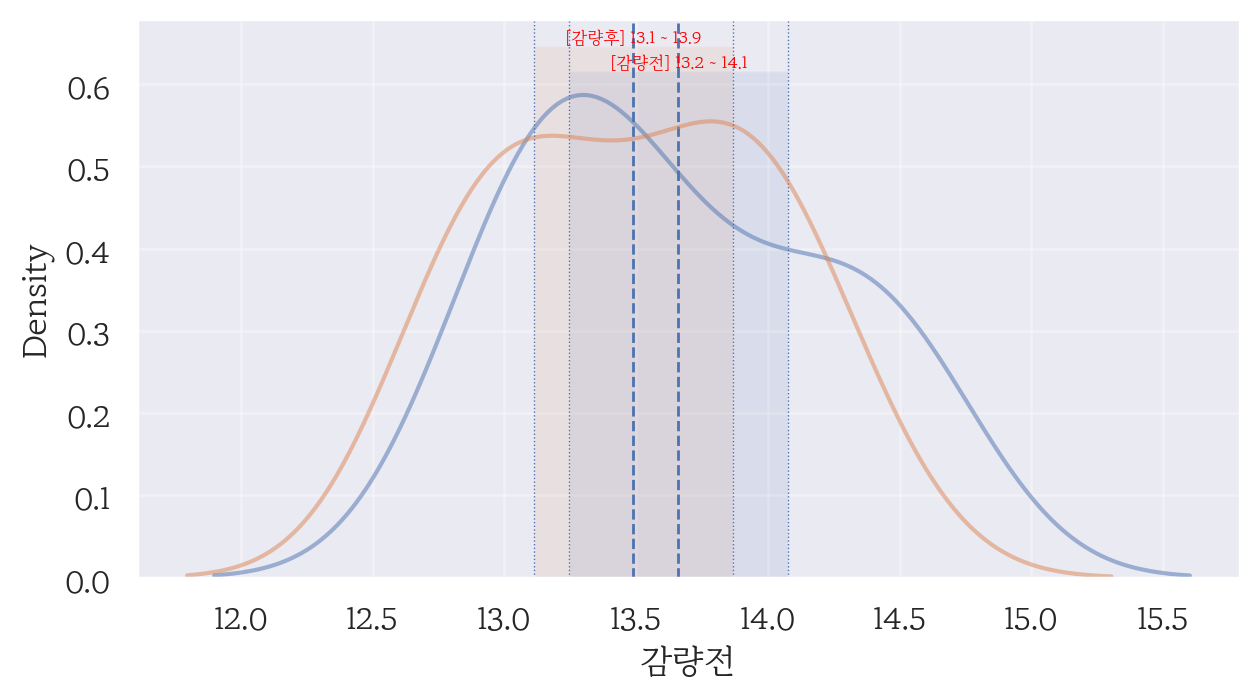

In [ ]:
data = origin[['감량전', '감량후']] # 확인할 데이터

# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
# KDE Plot 그리기
 sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

# 신뢰구간
 max = data[c].max() # 최대값
 clevel = 0.95 # 신뢰수준
 dof = len(data[c]) - 1 # 자유도
 sp_mean = data[c].mean() # 표본평균
 sp_std = data[c].std(ddof=1) # 표본표준편차
 sp_std_error = sp_std / sqrt(len(data[c])) # 표본표준오차
 cmin, cmax = t.interval(clevel, dof, loc=sp_mean, 
              scale=sp_std_error)
 ax.axvline(cmin, linestyle=':', linewidth=0.5)
 ax.axvline(cmax, linestyle=':', linewidth=0.5)

# 평균 표시
 ymin, ymax = ax.get_ylim()
 ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
 ax.axvline(sp_mean, linestyle='--', linewidth=1)

# 텍스트 그리기
 ax.text(x=(cmax-cmin)/2+cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

In [ ]:
data = origin[['감량전', '감량후']] # 검사하려는 데이터 추출
equal_var_fields = []
normal_dist = True
report = []
for c in data.columns:
    s, p = normaltest(data[c])
    
    normalize = p > 0.05
    report.append({
         "field": c,
         "statistic": s,
         "p-value": p,
         "result": normalize
    })
    normal_dist = normal_dist and normalize

# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
# 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T) # 모든 컬럼의 데이터를 한번에 전달

    else:
        n = "Levene" # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center='median') # 모든 컬럼의 데이터를 한번에 전달
   
    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
   })
report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
감량전,2.063078,0.356458,True
감량후,1.646609,0.438979,True
Bartlett,0.073124,0.786842,True


In [ ]:
s, p = ttest_rel(origin['감량전'], origin['감량후'], alternative = 'two-sided')       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: 2.375, p-value: 0.042, 대립가설 채택'

In [ ]:
s, p = ttest_rel(origin['감량전'], origin['감량후'], alternative = 'less')       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: 2.375, p-value: 0.979, 귀무가설 채택'

In [ ]:
s, p = ttest_rel(origin['감량전'], origin['감량후'], alternative = 'greater')       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: 2.375, p-value: 0.021, 대립가설 채택'

- 감량 전 후 차이가 없다.